# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [20]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [21]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [22]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

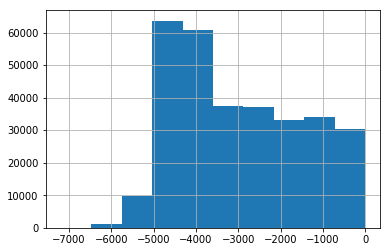

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
-4151    157
-4032    157
-4200    156
-4214    155
-4171    155
-4285    154
-4270    154
-4096    154
-4047    154
-4263    153
-4375    152
-4291    151
-4074    150
-4220    150
-4144    150
-4166    149
-4319    148
-4389    148
-4320    148
-4130    148
-4312    147
-4081    147
-4221    147
-4264    146
-4073    146
        ... 
-5826      1
-6337      1
-5960      1
-6274      1
-6162      1
-6201      1
-5868      1
-6220      1
-5652      1
-6016      1
-6086      1
-6015      1
-5862      1
-6135      1
-6028      1
-5879      1
-6211      1
-5915      1
-6212      1
-5955      1
-6074      1
-6029      1
-5913      1
-6206      1
-6117      1
-5696      1
-6073      1
-6076      1
-6176      1
-6189      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64

In [12]:
app_train['DAYS_ID_PUBLISH'].hist()
plt.show()
app_train['DAYS_ID_PUBLISH'].value_counts()

In [23]:
DAYS_PUBLISH = app_train['DAYS_ID_PUBLISH'] / (-365)
new_cut = [0,5,10,15,20,40]
app_train['DAYS_ID_PUBLISH']=pd.cut(DAYS_PUBLISH, new_cut)
app_train["DAYS_ID_PUBLISH"].value_counts()

(10, 15]    130120
(5, 10]      92698
(0, 5]       81801
(15, 20]      2876
(20, 40]         0
Name: DAYS_ID_PUBLISH, dtype: int64

In [26]:
print("Before replace NAs, numbers of row that DAYS_ID_PUBLISH is NAs: %i" % sum(app_train['DAYS_ID_PUBLISH'].isnull()))

# 列出重複最多的數值
print(app_train['DAYS_ID_PUBLISH'].value_counts().head())


mode_goods_price = list(app_train['DAYS_ID_PUBLISH'].value_counts().index)
app_train.loc[app_train['DAYS_ID_PUBLISH'].isnull(), 'DAYS_ID_PUBLISH'] = mode_goods_price[0]

print("After replace NAs, numbers of row that DAYS_ID_PUBLISH is NAs: %i" % sum(app_train['DAYS_ID_PUBLISH'].isnull()))

Before replace NAs, numbers of row that DAYS_ID_PUBLISH is NAs: 0
(10, 15]    130136
(5, 10]      92698
(0, 5]       81801
(15, 20]      2876
(20, 40]         0
Name: DAYS_ID_PUBLISH, dtype: int64
After replace NAs, numbers of row that DAYS_ID_PUBLISH is NAs: 0
